In [1]:
## Classifications

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from gympy.layers import Linear, Relu, Sigmoid, relu, sigmoid, linear, tanh, Tanh
from gympy.networks import NeuralNetwork
from gympy.optimizers import GradientDescent
import seaborn as sns

<AxesSubplot:xlabel='f1', ylabel='f2'>

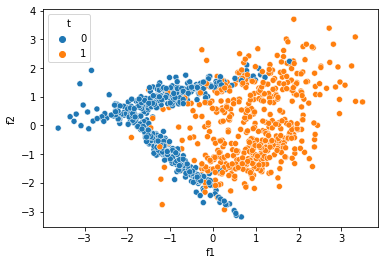

In [3]:

x, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_classes=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=2,
    #random_state=2107
)
df = pd.DataFrame(x, columns=['f1','f2'])
df['t'] = y
sns.scatterplot(data=df, x='f1',y='f2', hue='t')

In [12]:
model = NeuralNetwork(
    layers = [
        Sigmoid(n_input=2, n_output=1)
    ],
    optimizer = GradientDescent(learning_rate=1e-2),
    n_iter=1000
)

In [13]:
X = x.T
Y = y.reshape(1,-1)

<AxesSubplot:xlabel='f1', ylabel='f2'>

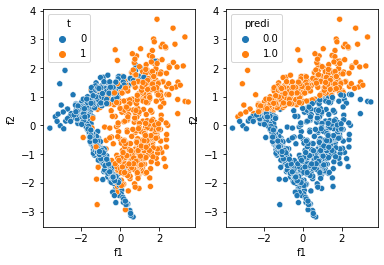

In [14]:
probi = model.forward(X)
predi = np.zeros((1,1000))
predi[probi>0.5] = 1
df['predi'] = predi.flatten()

fig, ax = plt.subplots(1,2)

sns.scatterplot(data=df, x='f1',y='f2', hue='t', ax=ax[0])
sns.scatterplot(data=df, x='f1',y='f2', hue='predi', ax=ax[1])

In [15]:
model.train(X, Y)

0 cost 0.6946924514350772
10 cost 0.6097953943207712
20 cost 0.5463611178509525
30 cost 0.4973563110573233
40 cost 0.45859424979503516
50 cost 0.4273911280749613
60 cost 0.40193507875753337
70 cost 0.38095328588797406
80 cost 0.36352237728712455
90 cost 0.34895426634976406
100 cost 0.3367243681064341
110 cost 0.32642481908671683
120 cost 0.31773305744957864
130 cost 0.31039016573731554
140 cost 0.30418560264132105
150 cost 0.29894622285747335
160 cost 0.29452823809261847
170 cost 0.2908112330747118
180 cost 0.28769364031778716
190 cost 0.2850892649482433
200 cost 0.2829245755510446
210 cost 0.2811365618680295
220 cost 0.27967101901534697
230 cost 0.27848115896925835
240 cost 0.2775264785589159
250 cost 0.27677183253682663
260 cost 0.2761866729976628
270 cost 0.27574442451168313
280 cost 0.2754219695092204
290 cost 0.27519922203096076
300 cost 0.2750587708934818
310 cost 0.2749855761618783
320 cost 0.2749667057709253
330 cost 0.27499110213833866
340 cost 0.2750493714793689
350 cost 0.27

In [16]:
prob = model.forward(X)
pred = np.zeros((1,1000))

pred[prob>0.5] = 1

df['pred'] = pred.flatten()
df.head()

,f1,f2,t,predi,pred
0,1.883963,-0.312713,1,0.0,1.0
1,-2.279053,0.753289,0,1.0,0.0
2,0.384397,0.184921,1,0.0,1.0
3,0.792310,0.568829,1,0.0,1.0
4,1.800965,2.135122,1,1.0,1.0


<AxesSubplot:xlabel='f1', ylabel='f2'>

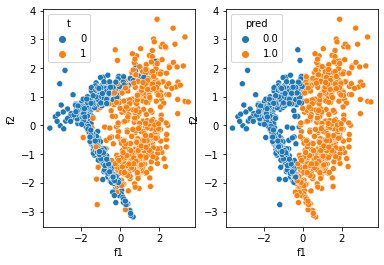

In [17]:
fig, ax = plt.subplots(1,2)

sns.scatterplot(data=df, x='f1',y='f2', hue='t', ax=ax[0])
sns.scatterplot(data=df, x='f1',y='f2', hue='pred', ax=ax[1])

In [18]:
x_ = np.array([[0],[4]])

In [19]:
model.forward(x_)

array([[0.29790385]])